In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# tensorflow dependencies:
import tensorflow as tf
from tensorflow import keras
print(f"Tensorflow Version: {tf.__version__}")

Tensorflow Version: 2.12.0


# 1. Dataset

In [5]:
train = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding= 'latin-1')

In [6]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
test=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv',  encoding= 'latin-1')

In [8]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


# 2. Data Exploration:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

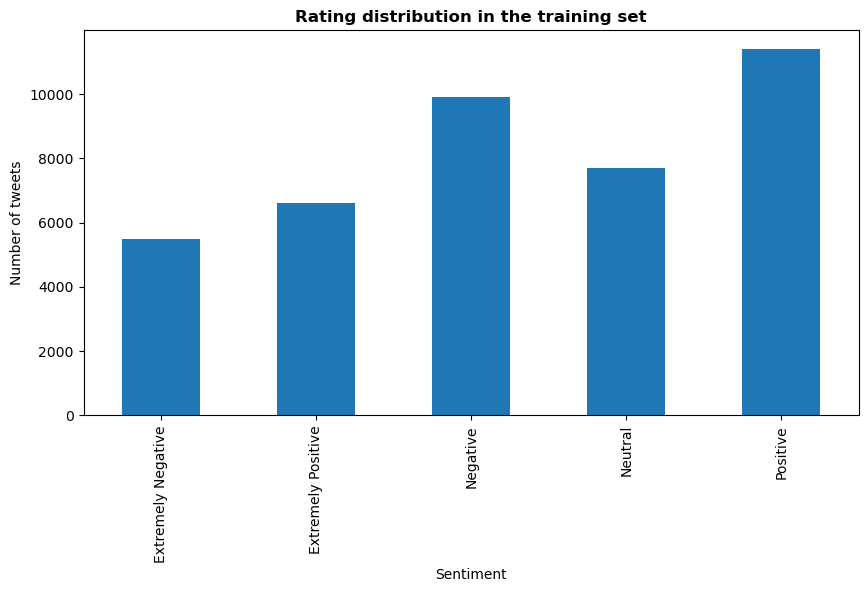

In [10]:
train['Sentiment'].value_counts().sort_index().plot.bar(figsize=(10,5))
plt.title('Rating distribution in the training set', fontweight="bold")
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.show()

## a. Shape of Data

In [11]:
train.shape

(41157, 6)

In [12]:
test.shape

(3798, 6)

## b. Size of Data

In [13]:
train.size

246942

In [14]:
test.size

22788

## c. Attributes

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


## d. Properties

In [17]:
train.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [18]:
test.describe()

,UserName,ScreenName
count,3798.000000,3798.000000
mean,1899.500000,46851.500000
std,1096.532489,1096.532489
min,1.000000,44953.000000
25%,950.250000,45902.250000
50%,1899.500000,46851.500000
75%,2848.750000,47800.750000
max,3798.000000,48750.000000


## e. EDA

In [19]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [20]:
test.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [21]:
len(train)

41157

In [22]:
len(test)

3798

In [23]:
train.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

In [24]:
test.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
dtype: object

## f. NULL Values

In [25]:
train.isna().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [26]:
train.isnull().sum()/len(train)*100

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

In [27]:
test.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [28]:
test.isnull().sum()/len(test)*100

UserName          0.000000
ScreenName        0.000000
Location         21.958926
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64

## g. Unique

In [29]:
train.nunique()

UserName         41157
ScreenName       41157
Location         12220
TweetAt             30
OriginalTweet    41157
Sentiment            5
dtype: int64

In [30]:
train.nunique().sum()

135726

In [31]:
test.nunique()

UserName         3798
ScreenName       3798
Location         1717
TweetAt            15
OriginalTweet    3798
Sentiment           5
dtype: int64

In [32]:
test.nunique().sum()

13131

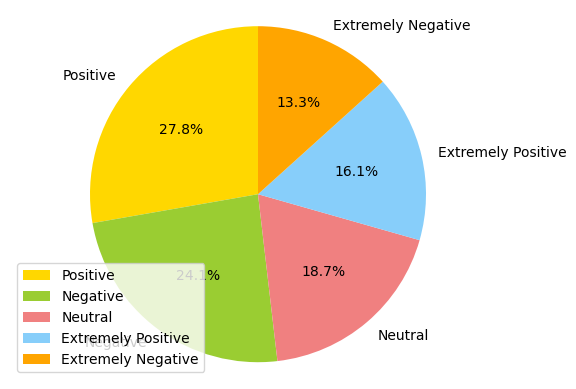

In [33]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']

plt.pie(sentiment_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.legend()
plt.show()

# 3. Data Pre-processing

## a. NULL Values

In [34]:
total_null_train = train.isnull().sum().sort_values(ascending = False)
percentage_null_train=((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending = False)

print("Total records = ", train.shape[0])

missing_data = pd.concat([total_null_train, percentage_null_train.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head()

Total records =  41157


,Total Missing,In Percent
Location,8590,20.87
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00


In [35]:
total_null_test = test.isnull().sum().sort_values(ascending = False)
percentage_null_test=((test.isnull().sum()/test.isnull().count())*100).sort_values(ascending = False)

print("Total records = ", test.shape[0])

missing_data = pd.concat([total_null_test, percentage_null_test.round(2)], axis=1, keys=['Total Missing', 'In Percent'])
missing_data.head()

Total records =  3798


,Total Missing,In Percent
Location,834,21.96
UserName,0,0.00
ScreenName,0,0.00
TweetAt,0,0.00
OriginalTweet,0,0.00


## b. Reduction of Data

In [36]:
train['Sentiment'].nunique()

5

In [37]:
train['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [38]:
test['Sentiment'].nunique()

5

In [39]:
test['Sentiment'].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

## Train, Test EDA

In [40]:
df=pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv', encoding='latin1')
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [41]:
# function to keep only Text and label:
def create_data(df):
    x=df['OriginalTweet']
    y=df['Sentiment']
    df=pd.concat((x,y),axis=1, keys=['texts','labels'])
    return df

In [42]:
%%time
#reduced data:
df=create_data(df)
df

CPU times: user 1.85 ms, sys: 0 ns, total: 1.85 ms
Wall time: 1.64 ms


,texts,labels
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [43]:
overview=pd.concat([df.isnull().sum(),df.nunique()],axis=1,keys=['Null Counts','Cardinality'])
overview

,Null Counts,Cardinality
texts,0,41157
labels,0,5


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['texts'], df['labels'], test_size=0.2, random_state=42)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((32925,), (32925,), (8232,), (8232,))

In [45]:
# text before cleaning:
x_train.iloc[0]

'Unemployment claims made online in Virginia this week:\r\r\n\r\r\nMonday: 426\r\r\nTuesday: 2,150\r\r\n\r\r\nAnd the numbers are going to get bigger. https://t.co/fUeg2RL2dl'

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
text_len = np.array([len(tweet.split(' ')) for tweet in x_train])

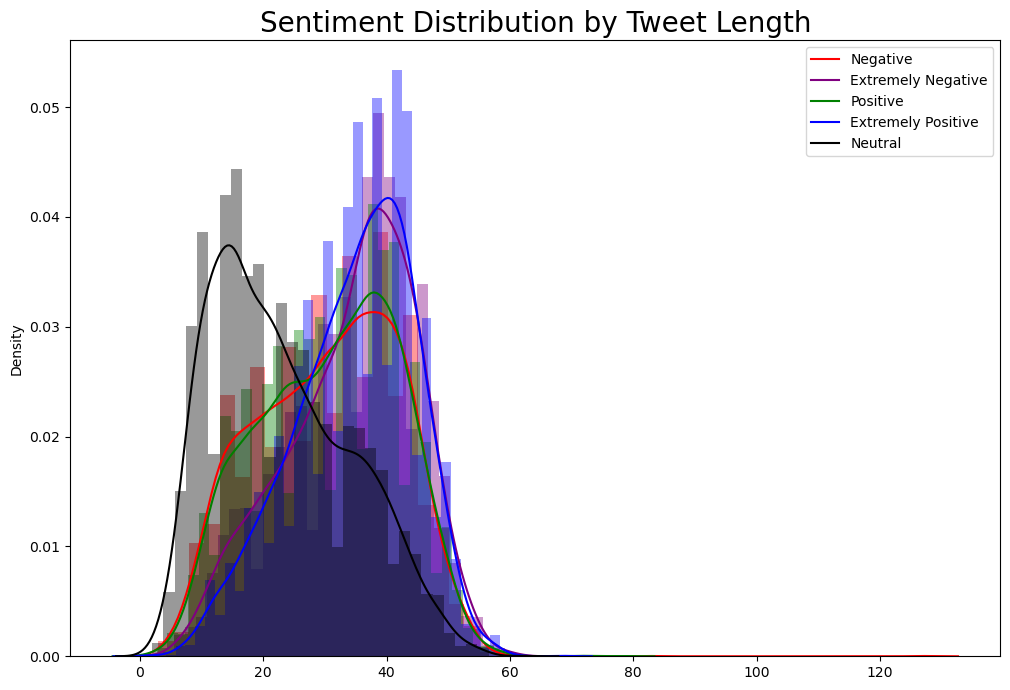

In [48]:
plt.subplots(figsize=(12,8))
sns.distplot(text_len[(y_train == 'Negative')], color='r')
sns.distplot(text_len[(y_train == 'Extremely Negative')], color='purple')
sns.distplot(text_len[(y_train == 'Positive')], color='g')
sns.distplot(text_len[(y_train == 'Extremely Positive')], color='blue')
sns.distplot(text_len[y_train == 'Neutral'], color='black')
plt.legend(['Negative', 'Extremely Negative',
            'Positive', 'Extremely Positive',
            'Neutral'])
plt.title('Sentiment Distribution by Tweet Length', fontsize=20)
plt.show()

## c. Data Cleaning 

In [49]:
x_train

8191     Unemployment claims made online in Virginia th...
3725     Panic-buying in response to #Covid19 could hav...
22759    E-cigarette users and tobacco smokers are more...
15010    You just know that a YouTube prankster is goin...
39142    "Our appetite for meat has to change, but we a...
                               ...                        
6265     Minnesota classifies grocery store workers as ...
11284    US Senator @ewarren has asked for information ...
38158    Just commented on @thejournal_ie: Poll: Are yo...
860      My wife got laid off yesterday because the sma...
15795    Humanity is doomed\r\r\n#coronavirus #coronacr...
Name: texts, Length: 32925, dtype: object

In [50]:
y_train

8191               Negative
3725     Extremely Negative
22759              Negative
15010               Neutral
39142    Extremely Negative
                ...        
6265               Negative
11284              Negative
38158    Extremely Negative
860                 Neutral
15795    Extremely Negative
Name: labels, Length: 32925, dtype: object

In [51]:
# dependencies:
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# initiating lemmatizer(kaggle specific):
# Define a install path for nltk
if os.environ.get('KAGGLE_KERNEL_RUN_TYPE', ''):
    nltk_path='/kaggle/working'
else:
    nltk_path="{}".format(os.getcwd())

isnltk_installed = os.path.isdir(f'{nltk_path}/nltk_data/corpora/wordnet')

# Install relevent libraries to nltk path
if isnltk_installed:
    nltk.data.path.append(f'{nltk_path}/nltk_data')
else:
    # Make directort name 'nlrk_data' in current work directory '/kaggle/working/'
    !mkdir nltk_data
    # Download neccessaty package as .zip file ('corpora' directory are automatically created)
    nltk.download('wordnet', f"{nltk_path}/nltk_data")
    nltk.download('omw-1.4', f"{nltk_path}/nltk_data/")
    # Unzip .zip file in folder '/kaggle/working/nltk_data/corpora'
    !unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
    !unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
    # Add custom location nltk file data path
    nltk.data.path.append(f'{nltk_path}/nltk_data')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  

### 0. Emoji Removing
### i. Hashtag Removal, 
### ii. Mentions Removal,
### iii. URL Removal, 
### iv. Stopwords Removal, 
### v. lowercase 
### vi. Punctuations Removal etc...

In [52]:
# function for NLP:
def nlp(text):
  def remove_emoji(text):
    emoji_pattern = re.compile(
      '['
      u'\U0001F600-\U0001F64F'  # emoticons
      u'\U0001F300-\U0001F5FF'  # symbols & pictographs
      u'\U0001F680-\U0001F6FF'  # transport & map symbols
      u'\U0001F1E0-\U0001F1FF'  # flags
      u'\U00002702-\U000027B0'
      u'\U000024C2-\U0001F251'
      ']+',
      flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
  def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokenizer = TweetTokenizer()
    words = tokenizer.tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return words
  text = remove_emoji(text)
  text = str(text).lower()
  text = re.sub(r'https?://\S+|www\.\S+', '', text)
  text = re.sub(r'RT[\s]+', '', text)
  text = re.sub(r'@\S+', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'\[', '', text)
  text = re.sub(r'\]', '', text)
  text = re.sub('â\\x92', "'", text)
  text = re.sub('â\S+', '', text)
  text = re.sub('\.+', '.', text)
  text = re.sub('&amp;', 'and', text)
  text = re.sub("let's", 'let us', text)
  text = re.sub("'s", ' is', text)
  text = re.sub("'re", ' are', text)
  text = re.sub("ain't", 'am not', text)
  text = re.sub("won't", 'will not', text)
  text = re.sub("n't", ' not', text)
  text = re.sub("'ve", ' have', text)
  text = re.sub("y'all", "you all", text)
  text = re.sub("'ll", ' will', text)
  text = re.sub("i'd", 'i would', text)
  text = re.sub("i'm", 'i am', text)
  text = re.sub(r"[^a-z<>!?\s]+", '', text)
  text = re.sub('covid\S*', 'coronavirus', text)
  text = re.sub('corona\S*', 'coronavirus', text)
  text = re.sub(r'\s+', ' ', text)
  text = lemmatize(text)
  return text

In [53]:
%%time
import tqdm.notebook as tq
x_train_clean = np.array([nlp(text) for text in tq.tqdm(x_train.values, desc='Progress')], dtype='O')
x_test_clean = np.array([nlp(sent) for sent in tq.tqdm(x_test.values, desc='Progress')], dtype='O')

Progress:   0%|          | 0/32925 [00:00<?, ?it/s]

Progress:   0%|          | 0/8232 [00:00<?, ?it/s]

CPU times: user 2min 30s, sys: 20.6 s, total: 2min 51s
Wall time: 2min 51s


In [54]:
# text after cleaning:
print(x_train_clean[0])

['unemployment', 'claim', 'made', 'online', 'virginia', 'week', 'monday', 'tuesday', 'number', 'going', 'get', 'bigger']


In [55]:
# array of list (of clean text data)
x_train_clean

array([list(['unemployment', 'claim', 'made', 'online', 'virginia', 'week', 'monday', 'tuesday', 'number', 'going', 'get', 'bigger']),
       list(['panicbuying', 'response', 'coronavirus', 'could', 'damaging', 'effect', 'agri', 'supply', 'chain', 'say', 'agri', 'economist', 'lunathi', 'hlakanyane', 'farmerschange', 'coronavirus', 'coronavirus']),
       list(['ecigarette', 'user', 'tobacco', 'smoker', 'danger', 'new', 'coronavirus', 'average', 'healthy', 'person']),
       ...,
       list(['commented', 'poll', 'online', 'shopping', 'normal', 'coronavirus', 'crisis', '?']),
       list(['wife', 'got', 'laid', 'yesterday', 'small', 'retail', 'store', 'work', 'got', 'walloped', 'walkin', 'business', 'vanishing', 'coronavirus', 'long', 'thinking', 'taking', 'ei', 'process', 'claim', 'right', '?']),
       list(['humanity', 'doomed', 'coronavirus', 'coronavirus', 'toiletpaper', 'toiletpapier', 'coronavirus', 'coronavirus'])],
      dtype=object)

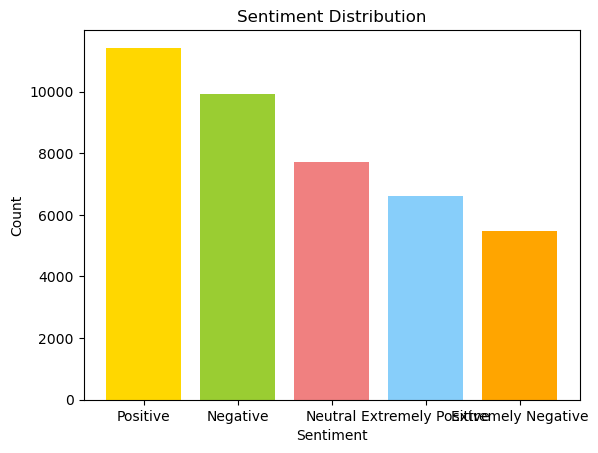

In [56]:
sentiment_counts = train['Sentiment'].value_counts()
labels = ['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative']
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange']

plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

# 5. Text Preprocessing

## Word Embedding and Sequence Padding

In [57]:
max_len = max([len(sent) for sent in x_train_clean])
max_len

151

### Word Embedding

In [58]:
from keras.preprocessing.text import Tokenizer

tok = Tokenizer(filters=None, oov_token='<OOV>')
tok.fit_on_texts(list(x_train_clean)+list(x_test_clean))

x_train_seq = tok.texts_to_sequences(x_train_clean)
x_test_seq = tok.texts_to_sequences(x_test_clean)

In [59]:
# checking random data:
print(x_train_seq[0])
print(x_train_clean[0])

[815, 719, 220, 13, 3442, 39, 667, 1239, 273, 31, 18, 2630]
['unemployment', 'claim', 'made', 'online', 'virginia', 'week', 'monday', 'tuesday', 'number', 'going', 'get', 'bigger']


In [60]:
# unique word tokens:
word_index = tok.word_index
len(word_index)

42931

### Sequence Padding

In [61]:
from keras.utils import pad_sequences
x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post')

In [62]:
x_train_pad.shape, x_test_pad.shape

((32925, 151), (8232, 151))

## Label Encoding

In [63]:
# before grouping:
print(np.unique(y_train))
print(np.unique(y_test))

['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']
['Extremely Negative' 'Extremely Positive' 'Negative' 'Neutral' 'Positive']


In [64]:
def encoder(data, enc=None):
  data[data=='Extremely Negative'] = 'Negative'
  data[data=='Extremely Positive'] = 'Positive'
  if(enc==None):
    from sklearn.preprocessing import OneHotEncoder
    onehot = OneHotEncoder()
    data_enc = onehot.fit_transform(np.array(data).reshape(-1,1)).toarray()
    return data_enc,onehot
  else:
    data_enc = enc.transform(np.array(data).reshape(-1,1)).toarray()
    return data_enc

In [65]:
y_train_enc, enc = encoder(y_train)
y_test_enc = encoder(y_test,enc)

In [66]:
y_train_enc, y_train_enc.shape

(array([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 (32925, 3))

In [67]:
y_test_enc, y_test_enc.shape

(array([[0., 1., 0.],
        [1., 0., 0.],
        [0., 0., 1.],
        ...,
        [1., 0., 0.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 (8232, 3))

# 6. Neural Networks

In [68]:
model = keras.Sequential([
    keras.layers.Embedding(len(word_index)+1, 151, input_length=max_len),
    keras.layers.SpatialDropout1D(0.5),
    keras.layers.Bidirectional(keras.layers.LSTM(100, recurrent_dropout=0.3)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.6),

    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 151, 151)          6482732   
                                                                 
 spatial_dropout1d (SpatialD  (None, 151, 151)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              201600    
 l)                                                              
                                                                 
 batch_normalization (BatchN  (None, 200)              800       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                        

## Model Training

In [70]:
es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.1)

logs = model.fit(x_train_pad,y_train_enc, validation_data=(x_test_pad, y_test_enc),
                    epochs=20, batch_size=512, callbacks=[es, reduce_lr])

Epoch 1/20
65/65 [==============================] - 79s 1s/step - loss: 0.7508 - accuracy: 0.6851 - val_loss: 0.9599 - val_accuracy: 0.6259 - lr: 0.0010
Epoch 2/20
65/65 [==============================] - 77s 1s/step - loss: 0.5172 - accuracy: 0.7988 - val_loss: 0.8661 - val_accuracy: 0.5790 - lr: 0.0010
Epoch 3/20
65/65 [==============================] - 76s 1s/step - loss: 0.3817 - accuracy: 0.8613 - val_loss: 0.7655 - val_accuracy: 0.6981 - lr: 0.0010
Epoch 4/20
65/65 [==============================] - 73s 1s/step - loss: 0.2930 - accuracy: 0.8975 - val_loss: 0.6386 - val_accuracy: 0.7439 - lr: 0.0010
Epoch 5/20
65/65 [==============================] - 75s 1s/step - loss: 0.2352 - accuracy: 0.9206 - val_loss: 0.6094 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 6/20
65/65 [==============================] - 74s 1s/step - loss: 0.1981 - accuracy: 0.9320 - val_loss: 0.6183 - val_accuracy: 0.7679 - lr: 0.0010
Epoch 7/20
65/65 [==============================] - 72s 1s/step - loss: 0.1782 - a

## Training Graph

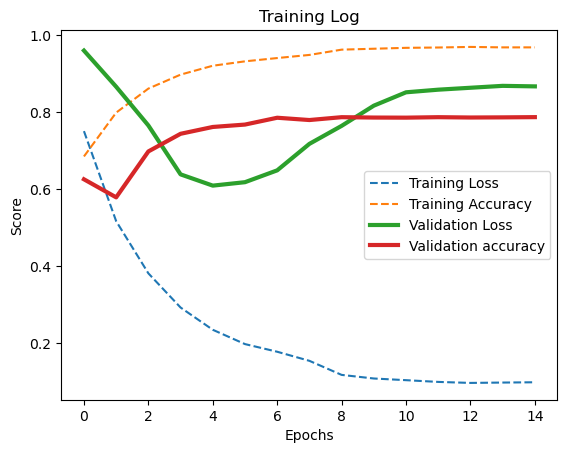

In [71]:
import matplotlib.pyplot as plt
plt.title('Training Log')
plt.plot(logs.history['loss'], label='Training Loss', linestyle='dashed')
plt.plot(logs.history['accuracy'], label='Training Accuracy', linestyle='dashed')
plt.plot(logs.history['val_loss'], label='Validation Loss', linewidth=3)
plt.plot(logs.history['val_accuracy'], label='Validation accuracy', linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.legend()
plt.show()

In [72]:
model.evaluate(x_test_pad,y_test_enc)

258/258 [==============================] - 19s 74ms/step - loss: 0.6094 - accuracy: 0.7617


[0.6093986630439758, 0.7616618275642395]

In [73]:
y_pred = model.predict(x_test_pad)

258/258 [==============================] - 21s 78ms/step


In [74]:
y_pred = enc.inverse_transform(y_pred)
y_pred = np.squeeze(y_pred)
y_pred

array(['Negative', 'Negative', 'Negative', ..., 'Positive', 'Neutral',
       'Negative'], dtype=object)

In [75]:
res = pd.concat((y_test.reset_index(drop=True),pd.Series(y_pred)), axis=1, keys=['actual','predicted'])
res

,actual,predicted
0,Neutral,Negative
1,Negative,Negative
2,Positive,Negative
3,Positive,Positive
4,Negative,Negative
...,...,...
8227,Positive,Positive
8228,Positive,Positive
8229,Negative,Positive
8230,Neutral,Neutral


In [76]:
# instances of correct predictions:
x = len(res.loc[res['actual']==res['predicted']])
print(f"Correct Predictions: {x} out of {len(res)} instances")

Correct Predictions: 6270 out of 8232 instances


## Testing

In [77]:
test_data = pd.read_csv('/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv', encoding='latin1')
test_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


In [78]:
test_data = create_data(test_data)
test_data

,texts,labels
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [79]:
test_overview=pd.concat([test_data.isnull().sum(),test_data.nunique()],axis=1,keys=['Null Counts','Cardinality'])
test_overview

,Null Counts,Cardinality
texts,0,3798
labels,0,5


In [80]:
import tqdm.notebook as tq
test_data_clean = np.array([nlp(text) for text in tq.tqdm(test_data['texts'].values, desc='Progress')], dtype='O')

Progress:   0%|          | 0/3798 [00:00<?, ?it/s]

In [81]:
test_data_clean

array([list(['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelf', 'pictured', 'wegmans', 'brooklyn', 'soldout', 'online', 'grocer', 'foodkick', 'maxdelivery', 'coronavirus', 'shopper', 'stock']),
       list(['could', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', '?', '?', '!', '!', 'check', 'coronavirus', 'concern', 'driving', 'price']),
       list(['find', 'protect', 'loved', 'one', 'coronavirus', '?']), ...,
       list(['asst', 'prof', 'economics', 'talking', 'recent', 'research', 'coronavirus', 'impact', 'economy', 'watch', 'starting']),
       list(['gov', 'need', 'somethings', 'instead', 'biar', 'je', 'rakyat', 'assume', 'lockdown', 'ke', 'even', 'worst', 'harini', 'semua', 'supermarket', 'crowded', 'like', 'hell', 'lagi', 'mudah', 'virus', 'tu', 'tersebar', '?', '?', 'coronavirus']),
       list(['member', 'committed', 'safety', 'employee', 'endusers', 'monitoring', 'coronavirus', 'rest', 'assured', 'tissue', 'manufa

In [82]:
l = max([len(sent) for sent in test_data_clean])
l

40

In [83]:
test_data_seq = tok.texts_to_sequences(test_data_clean)

In [84]:
print(test_data_seq[0])
print(test_data_clean[0])

[1910, 37, 4786, 5719, 144, 6, 51, 7143, 4495, 3107, 7016, 13, 1405, 1, 1, 2, 203, 28]
['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelf', 'pictured', 'wegmans', 'brooklyn', 'soldout', 'online', 'grocer', 'foodkick', 'maxdelivery', 'coronavirus', 'shopper', 'stock']


In [85]:
test_data_pad = pad_sequences(test_data_seq, maxlen=l, padding='post')

In [86]:
test_label_enc = encoder(test_data['labels'],enc)
test_label_enc

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [87]:
model.evaluate(test_data_pad,test_label_enc)

119/119 [==============================] - 3s 22ms/step - loss: 0.6270 - accuracy: 0.7428


[0.6269935369491577, 0.7427593469619751]

## Testing our Model on Random Data

In [88]:
s1 = "Pandemic is very dangerous."
s2 = "#tweet #danger Covid-19. Be safe."
s3 = "I am going to buy a new mobile."
s4 = "@Aniket, I love you."
s5 = "Twitter is a greater platfrom to express"
data=[]
data.append(s1)
data.append(s2)
data.append(s3)
data.append(s4)
data.append(s5)

data=pd.Series(data)
data

0                 Pandemic is very dangerous.
1           #tweet #danger Covid-19. Be safe.
2             I am going to buy a new mobile.
3                        @Aniket, I love you.
4    Twitter is a greater platfrom to express
dtype: object

In [89]:
data_clean = np.array([nlp(text) for text in data.values], dtype='O')
data_clean

array([list(['pandemic', 'dangerous']),
       list(['tweet', 'danger', 'coronavirus', 'safe']),
       list(['going', 'buy', 'new', 'mobile']), list(['love']),
       list(['twitter', 'greater', 'platfrom', 'express'])], dtype=object)

In [90]:
mx_len = max([len(sent) for sent in data_clean])
data_seq = tok.texts_to_sequences(data_clean)
data_pad = pad_sequences(data_seq, maxlen=mx_len, padding='post')

In [91]:
pred = model.predict(data_pad)
pred = enc.inverse_transform(pred)

1/1 [==============================] - 0s 437ms/step


In [92]:
res = pd.concat((data,pd.Series(pred.ravel())), axis=1, keys=['texts', 'sentiments'])
res

,texts,sentiments
0,Pandemic is very dangerous.,Negative
1,#tweet #danger Covid-19. Be safe.,Positive
2,I am going to buy a new mobile.,Negative
3,"@Aniket, I love you.",Positive
4,Twitter is a greater platfrom to express,Positive
